In [3]:
import numpy as np
from cv2 import aruco
import cv2
from matplotlib import pyplot as plt
import matplotlib as mpl
import pickle

In [4]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

In [5]:
cap = cv2.VideoCapture(0)

In [6]:
ret, mtx, dist, rvecs, tvecs = pickle.load(open("cal_data.pkl", "rb"))

In [7]:
marker_length = .05

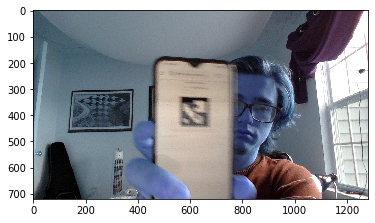

Projected Points:  [[[647.884   370.7735 ]]

 [[646.2428  260.52927]]

 [[759.6907  267.29025]]

 [[762.9758  378.90018]]

 [[670.6939  343.24738]]

 [[668.75287 239.01334]]

 [[777.13666 245.49759]]

 [[780.4975  351.03662]]] 



[[647 370]
 [646 260]
 [759 267]
 [762 378]]


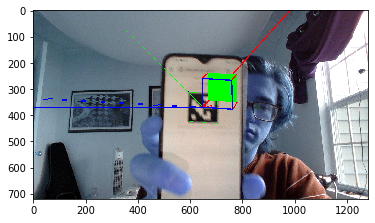

Projected Points:  [[[620.77356 346.2607 ]]

 [[622.15814 246.48183]]

 [[724.00824 249.45358]]

 [[724.4715  349.16022]]

 [[618.0349  330.68536]]

 [[619.396   235.65372]]

 [[716.7481  238.4158 ]]

 [[717.0934  333.4066 ]]] 



[[620 346]
 [622 246]
 [724 249]
 [724 349]]


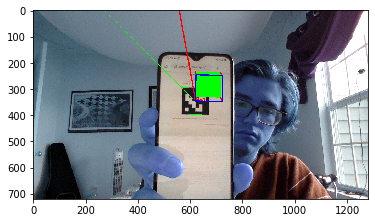

Projected Points:  [[[607.4775  365.83295]]

 [[609.3737  265.68552]]

 [[711.9875  269.43564]]

 [[711.79156 369.7285 ]]

 [[610.52563 345.51157]]

 [[612.2665  250.28116]]

 [[710.2949  253.8424 ]]

 [[710.11475 349.23663]]] 



[[607 365]
 [609 265]
 [711 269]
 [711 369]]


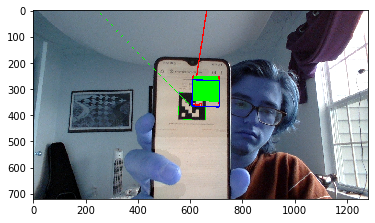

Projected Points:  [[[612.7141  341.84354]]

 [[614.2229  244.73642]]

 [[714.56696 248.30154]]

 [[714.6299  345.6051 ]]

 [[615.8989  321.94357]]

 [[617.2746  229.5441 ]]

 [[713.2222  232.92647]]

 [[713.2824  325.53815]]] 



[[612 341]
 [614 244]
 [714 248]
 [714 345]]


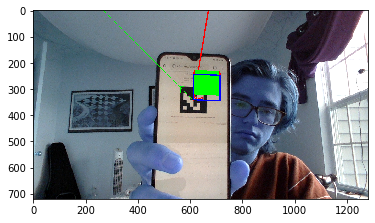

Projected Points:  [[[611.56006 344.43826]]

 [[613.54956 247.37607]]

 [[711.3183  250.73128]]

 [[711.51245 347.66177]]

 [[606.7679  339.01508]]

 [[608.77966 246.00417]]

 [[702.5652  249.12054]]

 [[702.5815  342.01346]]] 



[[611 344]
 [613 247]
 [711 250]
 [711 347]]


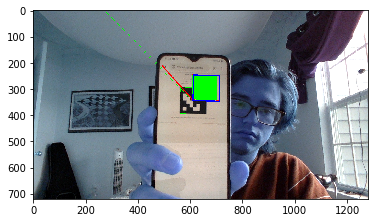

Projected Points:  [[[612.0591  336.23425]]

 [[614.9094  239.53899]]

 [[712.96216 243.52197]]

 [[712.07745 340.0978 ]]

 [[607.1383  326.2523 ]]

 [[609.9617  233.81717]]

 [[703.9077  237.53072]]

 [[702.9083  329.8671 ]]] 



[[612 336]
 [614 239]
 [712 243]
 [712 340]]


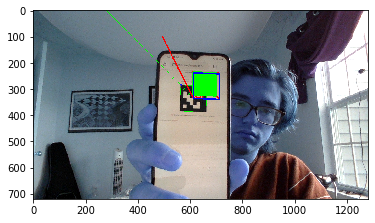

Projected Points:  [[[609.96735 329.2884 ]]

 [[612.86005 233.33623]]

 [[711.493   237.94019]]

 [[710.32764 334.1398 ]]

 [[613.0947  314.59186]]

 [[615.79865 223.07478]]

 [[710.2476  227.46495]]

 [[709.1233  319.2324 ]]] 



[[609 329]
 [612 233]
 [711 237]
 [710 334]]


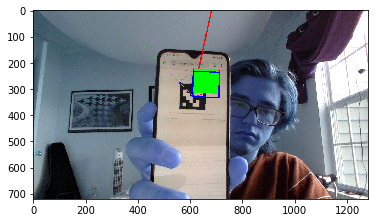

Projected Points:  [[[606.249   327.73163]]

 [[609.5095  233.47488]]

 [[706.3302  237.65953]]

 [[706.01404 332.1493 ]]

 [[607.32306 342.27344]]

 [[610.4525  250.77414]]

 [[703.8672  254.83707]]

 [[703.47705 346.52634]]] 



[[606 327]
 [609 233]
 [706 237]
 [706 332]]


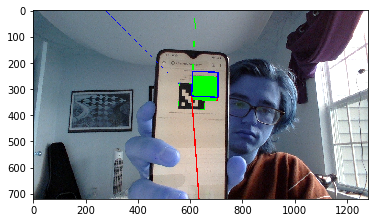

Projected Points:  [[[573.97955 317.12354]]

 [[577.8553  223.30109]]

 [[675.70703 228.35605]]

 [[673.26154 322.52316]]

 [[581.0588  296.0959 ]]

 [[584.6466  206.81104]]

 [[678.27985 211.65378]]

 [[675.98376 301.27893]]] 



[[573 317]
 [577 223]
 [675 228]
 [673 322]]


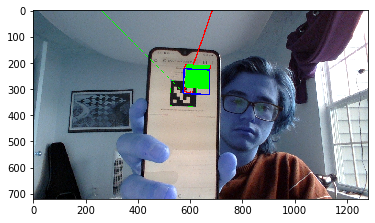

Projected Points:  [[[573.6726  317.76126]]

 [[577.5143  224.36182]]

 [[672.1636  229.88593]]

 [[671.17786 323.0613 ]]

 [[562.5862  330.221  ]]

 [[566.6256  239.6216 ]]

 [[657.9761  244.70973]]

 [[656.61475 335.0704 ]]] 



[[573 317]
 [577 224]
 [672 229]
 [671 323]]


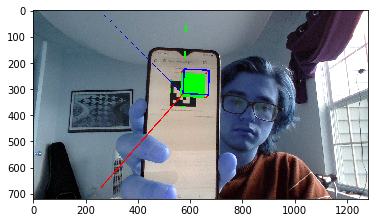

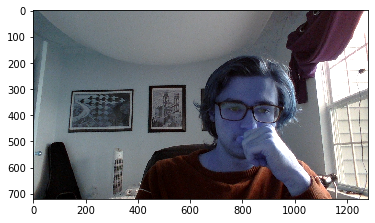

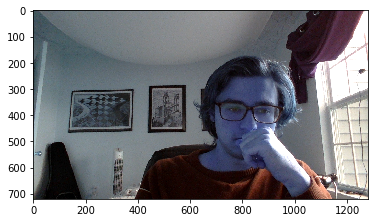

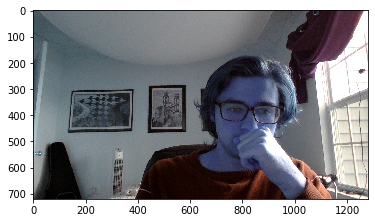

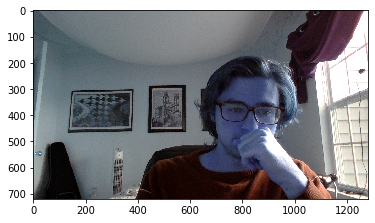

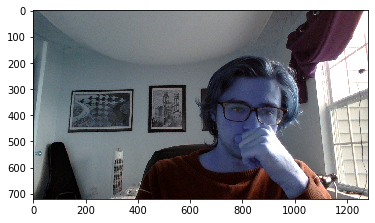

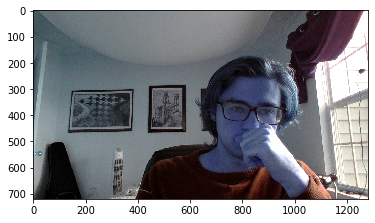

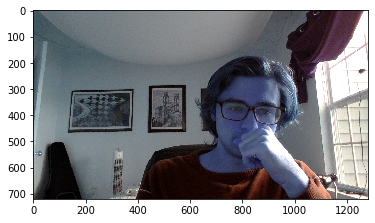

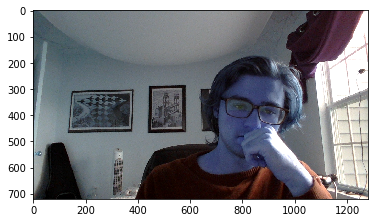

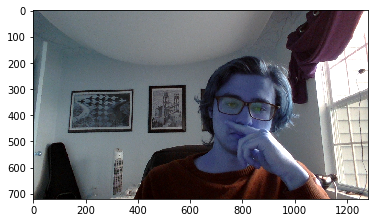

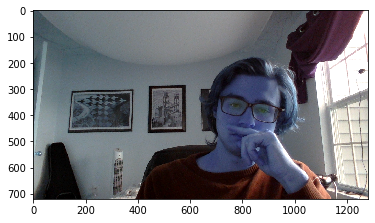

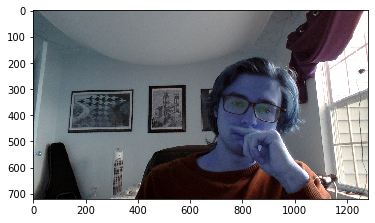

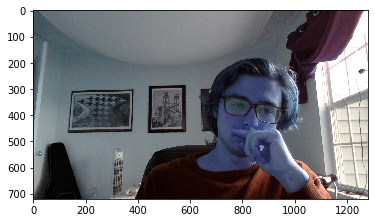

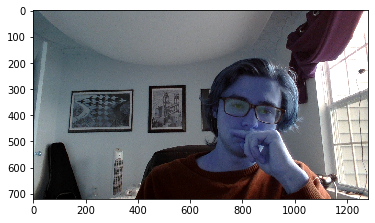

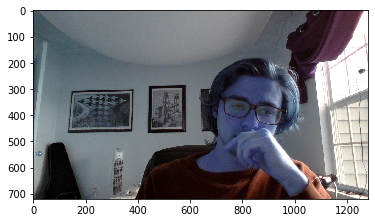

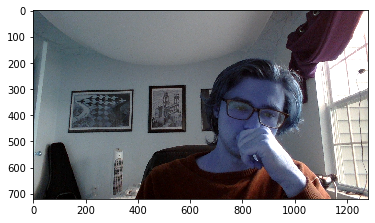

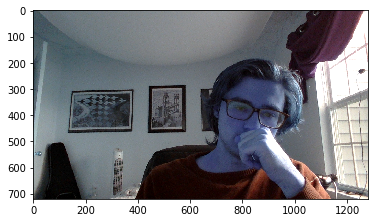

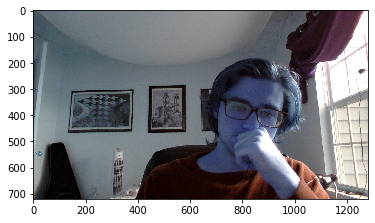

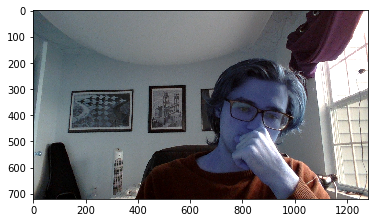

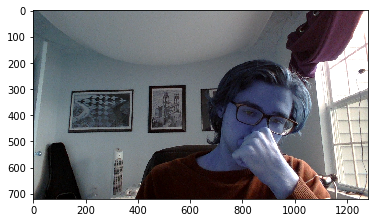

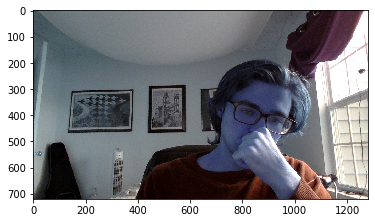

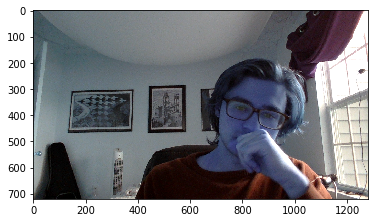

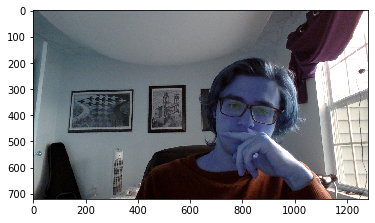

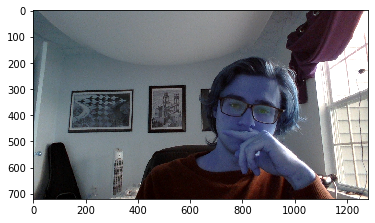

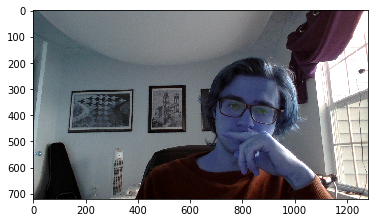

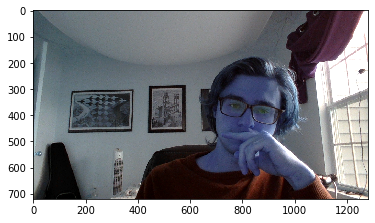

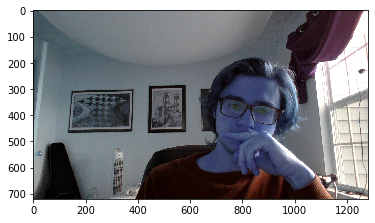

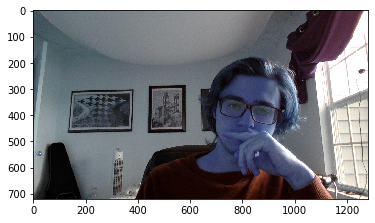

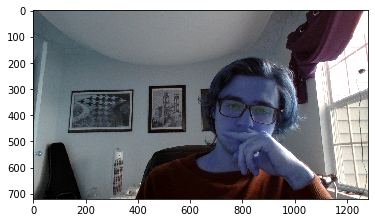

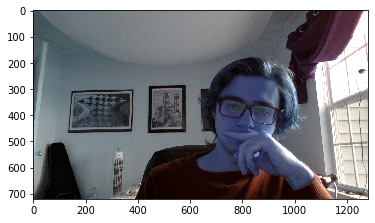

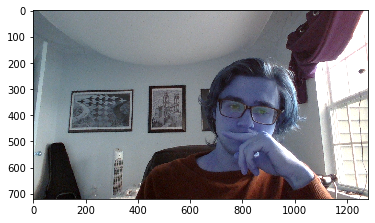

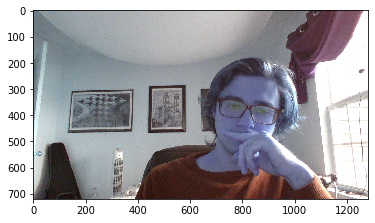

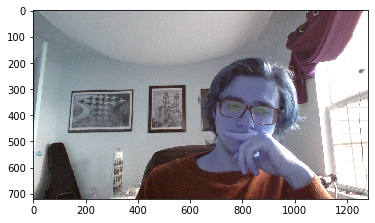

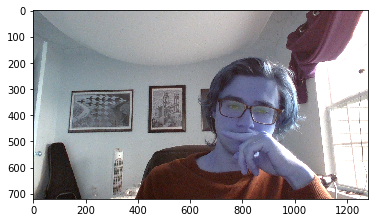

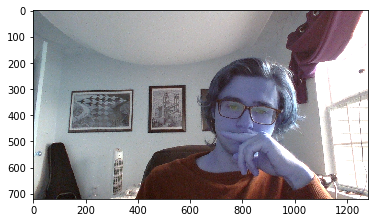

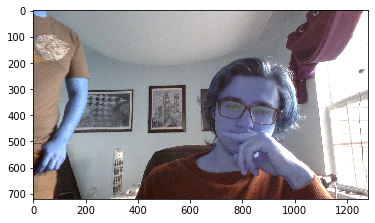

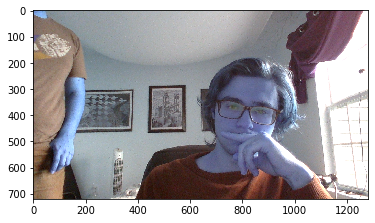

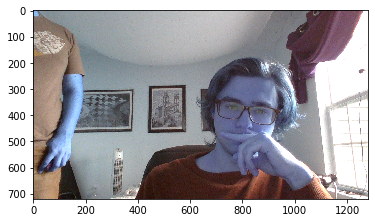

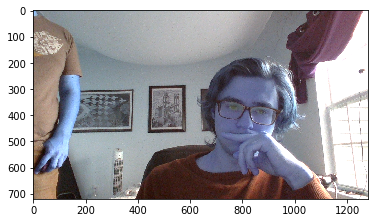

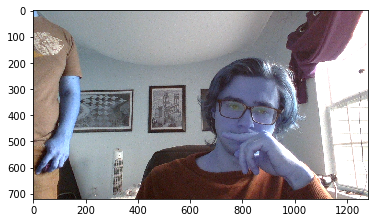

In [10]:
frames = []
axis = np.float32([[0,0,0], [0,marker_length,0], [marker_length,marker_length,0], [marker_length,0,0],
                   [0,0,marker_length],[0,marker_length,marker_length],[marker_length,marker_length,marker_length],[marker_length,0,marker_length] ])
for c in range(50):
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    parameters =  aruco.DetectorParameters_create()
    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    if ids != None:
        frame_markers = aruco.drawDetectedMarkers(frame, corners, ids)
        rvec, tvec, _ = aruco.estimatePoseSingleMarkers(corners, 0.05, mtx, dist)
        for i, marker in enumerate(ids):
            imgpts, jac = cv2.projectPoints(axis, rvec[i], tvec[i], mtx, dist)
            print("Projected Points: ", imgpts, "\n\n\n")
            aruco.drawAxis(frame, mtx, dist, rvec[i], tvec[i], 100)
            draw_cube(frame, imgpts)
    frames.append(frame)
    # Display Frame
    plt.imshow(frame)
    plt.show()
    if cv2.waitKey(1) == ord('q'):
        break

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [9]:
def draw_cube(img, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)

    # draw ground floor in green
    img = cv2.drawContours(img, [imgpts[4:]],-1,(0,255,0),-3)

    # draw pillars in blue color
    for i,j in zip(range(4),range(4,8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)

    # draw top layer in red color
    print(imgpts[:4])
    img = cv2.drawContours(img, [imgpts[:4]],-1,(0,0,255),3)

    return img


In [ ]:
imgpts[:4]

In [11]:
imgpts[4:]

array([[[658.05707, 281.46976]],

       [[736.82776, 257.579  ]],

       [[762.0421 , 338.5569 ]],

       [[682.4706 , 363.88687]]], dtype=float32)